In [1]:
from reinforce.tic_tac_toe.environment import TestBed
import pandas as pd
%matplotlib inline

In [15]:
test_bed = TestBed()
test_bed.play_episodes(10000)

In [16]:
results = pd.DataFrame({'winners': test_bed.winners}).fillna(0)

In [17]:
mean_results = results.winners.rolling(25).mean()

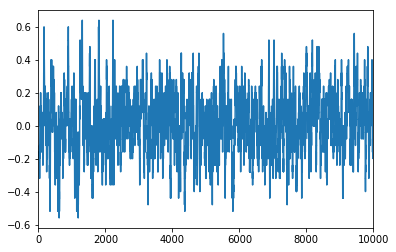

In [18]:
mean_results.plot()